<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Ahmad !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Ahmad ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Ahmad dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# RESTAURANT ANALYSIS

# Contents

    1. Introduction
    2. Menyiapkan Data Untuk Analisis
    3. Analisis Data

        3.1. Meneliti proporsi dari berbagai jenis usaha
        3.2. Meliti proporsi dari usaha berbasis franchise (waralaba) dan nonfranchise
        3.3. Menganalisis usaha yang berbasis franchise
        3.4. Menentukan ciri-ciri dari jenis usaha berbasis franchise: memiliki banyak tempat dengan jumlah kursi 
        yang sedikit atau memiliki beberapa tempat dengan jumlah kursi yang banyak
        3.5. Menentukan jumlah rata-rata kursi untuk setiap jenis usaha franchise
        3.6. Menganalisis usaha berdasarkan nama jalan
        3.7. Menampilkan sepuluh nama jalan teratas berdasarkan jumlah usaha (tempat makan)
        3.8. Menemukan jumlah jalan yang hanya memiliki satu usaha (tempat makan)
        3.9. Menganalisis jumlah kursi yang digunakan oleh tempat usaha untuk jalan yang dihuni oleh banyak 
        usaha (tempat makan)
     4. Kesimpulan Umum

# 1. Introduction

# Deskripsi proyek

Kamu telah memutuskan untuk membuka sebuah kafe kecil di Los Angeles. Kafe milikmu bisa dibilang cukup unik karena kamu "memperkerjakan" robot sebagai pelayan atau pramusaji. Proyek ini memang menjanjikan, tetapi membutuhkan modal yang besar. Oleh karena itu, kamu dan para mitra memutuskan untuk menarik minat investor agar mau berinvestasi. Mereka tertarik dengan kondisi pasar saat ini—tetapi, apakah kamu bisa mempertahankan kesuksesan saat daya tarik sang robot mulai pudar?
Mengingat kamu adalah seorang pakar analisis, para mitra pun memintamu untuk mempersiapkan sejumlah riset pasar. Kamu memiliki data open-source terkait jenis-jenis usaha tempat makan di LA.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 2. Menyiapkan Data untuk Analisis



In [298]:
import pandas as pd, numpy as np
import datetime as dt
import matplotlib.pyplot as plt, seaborn as sns
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [299]:
rest = pd.read_csv('/datasets/rest_data_us.csv')
rest

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [300]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


Tabel rest berisi data tentang:

    - id - no ID usaha
    - object_name — nama usaha
    - chain — usaha berbasis waralaba (TRUE/FALSE)
    - object_type — jenis usaha
    - address — alamat
    - number — jumlah kursi

In [301]:
#Mengecek missing vslues
rest.isnull().sum()

#Di kolom chain terdapat 3 missing values

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [302]:
#Karena jumlahnya sangat sedikit, missing values bisa dihilangkan
rest = rest.dropna().reset_index(drop=True)

In [303]:
rest.isnull().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [304]:
rest.duplicated().sum()

#Tidak ada data duplikat

0

In [305]:
rest['chain'] = rest['chain'].astype(bool)

In [306]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   bool  
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.4+ KB


- Kesimpulan:
    - Tabel Rest memberikan informasi tentang seluruh nama-nama usaha tempat makan di Los Angeles
    - Terdiri dari 9648 baris data dan 6 kolom
    - Masing-masing data tempat usaha memiliki data nama, alamat, jenis usaha, tipe usaha, dan jumlah kursi yang digunakan

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 3. Analisis Data

# 3.1. Meneliti proporsi dari berbagai jenis usaha

In [307]:
rest['object_name'].shape
#Total usaha tempat makan di Los Angeles sebanyak 9648 usaha

(9648,)

In [308]:
#Menghitung jumlah bisnis berdasarkan jenisnya
business_counts = rest['object_type'].value_counts()
business_counts

Restaurant    7253
Fast Food     1066
Cafe           435
Pizza          319
Bar            292
Bakery         283
Name: object_type, dtype: int64

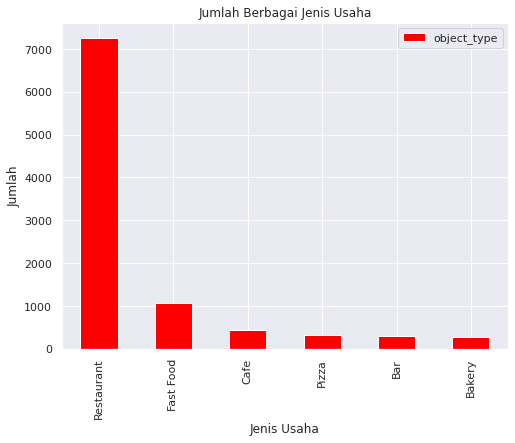

In [309]:
#Membuat diagram batang untuk jumlah berbagai jenis usaha
plt.figure(figsize=(8, 6))
business_counts.plot(kind='bar', xlabel='Jenis Usaha', ylabel='Jumlah', color='red')
plt.title('Jumlah Berbagai Jenis Usaha')
plt.legend()
plt.show()

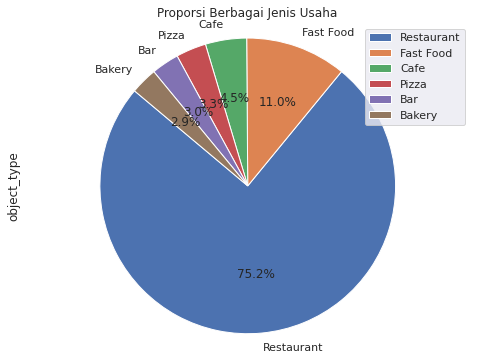

In [310]:
#Membuat grafik piechart untuk proporsi berbagai jenis usaha
plt.figure(figsize=(8, 6))
business_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Berbagai Jenis Usaha')
plt.axis('equal')
plt.legend()
plt.show()

   -Kesimpulan:
   
        - Berdasarkan jenis usahanya, usaha yang paling banyak di Los Angeles adalah restaurant sebanyak 7253 tempat 
        atau 75.2 % 

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 3.2. Meneliti proporsi dari usaha berbasis Franchise (waralaba) dan nonfranchise

In [311]:
rest = rest.rename(columns={'chain': 'franchise'})
rest['franchise'] = rest['franchise'].replace(True, 'Yes').replace(False, 'No')
rest.head(10)

,id,object_name,address,franchise,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,No,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,No,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,No,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,No,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,No,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,No,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,No,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,No,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,Yes,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,No,Restaurant,35


In [312]:
#Jumlah usaha yang berbasis franchise dan nonfranchise
rest['franchise'].value_counts()

No     5972
Yes    3676
Name: franchise, dtype: int64

<AxesSubplot:xlabel='franchise', ylabel='count'>

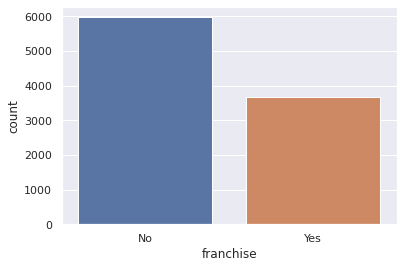

In [313]:
#Diagram batang untuk jumlah usaha berbasis franchise dan nonfranchise
sns.countplot(rest['franchise'])

In [314]:
#Menghitung proporsi dari usaha franchise dan nonfranchise
proporsi_franchise = rest['franchise'].value_counts(normalize=True)
proporsi_franchise

No     0.618988
Yes    0.381012
Name: franchise, dtype: float64

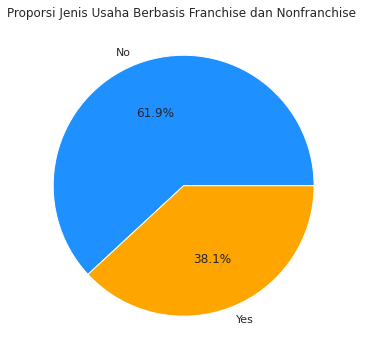

In [315]:
#Membuat piechart untuk proporsi franchise
plt.figure(figsize=(8, 6))
proporsi_franchise.plot(kind='pie', autopct='%1.1f%%', colors=['dodgerblue', 'orange'])
plt.title('Proporsi Jenis Usaha Berbasis Franchise dan Nonfranchise ')
plt.ylabel('')
plt.show()

Kesimpulan:

    - Jenis usaha yang berbasis franchise lebih sedikit daripada nonfranchise yakni berjumlah 3676 usaha atau 38.1 %.
    - Jenis usaha yang tidak berbasis franchise berjumlah 5972 usaha atau 61.9 %

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 3.3. Menganalisis usaha yang berbasis franchise

In [316]:
rest['object_type'].value_counts()

Restaurant    7253
Fast Food     1066
Cafe           435
Pizza          319
Bar            292
Bakery         283
Name: object_type, dtype: int64

In [317]:
#Menghitung jenis usaha yang berbasis franchise dan nonfranchise
franchise_type = pd.pivot_table(rest, index='object_type', columns=['franchise'], values='object_name', aggfunc='count').fillna(1)
franchise_type.sort_values(by='Yes', ascending=False)

franchise,No,Yes
object_type,,
Restaurant,4961.0,2292.0
Fast Food,461.0,605.0
Bakery,1.0,283.0
Cafe,169.0,266.0
Pizza,166.0,153.0
Bar,215.0,77.0


<AxesSubplot:xlabel='object_type'>

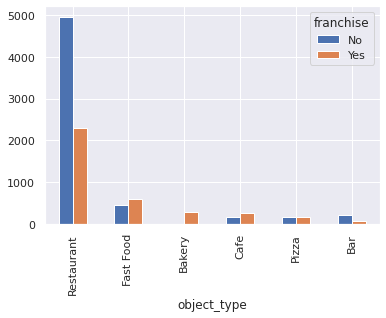

In [318]:
franchise_type.sort_values(by='Yes', ascending=False).plot(kind='bar')

In [319]:
franchise_type['ratio'] = (franchise_type['Yes'] / (franchise_type['Yes'] + franchise_type['No'])) * 100
franchise_type.sort_values(by='ratio', ascending=False)

franchise,No,Yes,ratio
object_type,,,
Bakery,1.0,283.0,99.647887
Cafe,169.0,266.0,61.149425
Fast Food,461.0,605.0,56.754221
Pizza,166.0,153.0,47.962382
Restaurant,4961.0,2292.0,31.600717
Bar,215.0,77.0,26.369863


<AxesSubplot:title={'center':'Perbandingan Antara Jumlah Usaha Franchise dengan Nonfranchise'}, xlabel='Jenis Usaha'>

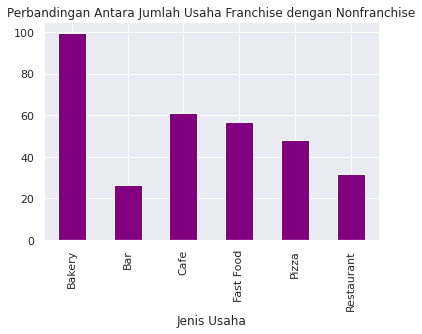

In [320]:
franchise_type['ratio'].plot(kind='bar', color='purple', xlabel='Jenis Usaha', title='Perbandingan Antara Jumlah Usaha Franchise dengan Nonfranchise')

Kesimpulan:

    - Dari keenam jenis usaha, semuanya memiliki jenis usaha franchise. Jenis usaha yang paling banyak 
    franchisenya adalah jenis Restaurant sebanyak 2292 usaha. Namun secara ratio jenis usaha Restaurant memiliki 
    ratio franchise paling kecil yakni 31.6 %
    - Dari segi ratio, jenis usaha Bakery memiliki ratio franchise terbesar yakni 99.64 %. Dari 284 
    tempat usaha Bakery, hanya 1 tempat yang nonfranchise.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 3.4. Menentukan ciri-ciri jenis usaha berbasis waralaba: memiliki banyak tempat dengan jumlah kursi yang sedikit atau memiliki beberapa tempat dengan jumlah kursi yang banyak

In [321]:
#Memfilter usaha yang berbasis franchise saja
only_franchise = rest_franchise[rest_franchise['franchise'] == 'Yes'].sort_values(by='number', ascending=False)
only_franchise

,id,object_name,address,franchise,object_type,number
224,12380,KABUKI JAPANESE RESTAURANT,1545 N VINE ST,Yes,Restaurant,229
184,12261,MOUNTAINGATE COUNTRY CLUB,12445 MOUNTAIN GATE DR,Yes,Restaurant,229
2828,19169,MANNA KOREAN BBQ,3986 WILSHIRE BLVD,Yes,Restaurant,229
2081,17264,CHUCK E CHEESE'S #397,2706 WILSHIRE BLVD,Yes,Restaurant,228
179,12243,USC MAIN KITCHEN-BASEMENT,3607 TROUSDALE PKWY,Yes,Restaurant,227
...,...,...,...,...,...,...
2050,17178,RASPADOS DON MANUEL,2848 E 4TH ST,Yes,Restaurant,1
2074,17244,PARU'S INDIAN RESTAURANT,5140 W SUNSET BLVD,Yes,Restaurant,1
2115,17363,BERLIN CURRYWURST,3827 W SUNSET BLVD STE #C,Yes,Restaurant,1
2116,17364,VICKY'S RESTAURANT,2308 E 1ST ST,Yes,Restaurant,1


In [322]:
#Menghitung jumlah tempat usaha yang berbasis franchise
count_places_franchise = only_franchise.groupby('object_type').agg({'id':'count'}).reset_index()
count_places_franchise.columns = ['object_type', 'total_places']
count_places_franchise.sort_values(by='total_places', ascending=False)

,object_type,total_places
5,Restaurant,2292
3,Fast Food,605
0,Bakery,283
2,Cafe,266
4,Pizza,153
1,Bar,77


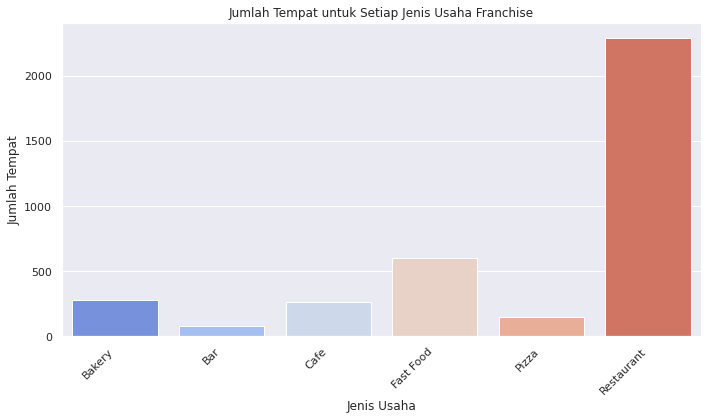

In [323]:
#Membuat grafik jumlah tempat
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.barplot(x='object_type', y='total_places', data=count_places_franchise, palette='coolwarm')
plt.title('Jumlah Tempat untuk Setiap Jenis Usaha Franchise')
plt.xlabel('Jenis Usaha')
plt.ylabel('Jumlah Tempat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Kesimpulan:

    - Jenis usaha franchise yang memiliki tempat yang paling banyak adalah Restaurant sebanyak 2292 tempat usaha
    - Jenis usaha franchise yang memiliki tempat yang paling sedikit adalah Bar sebanyak 77 tempat usaha

In [324]:
#Menghitung jumlah kursi di setiap tempat usaha yang berbasis franchise
count_seats_franchise = only_franchise.groupby('object_type').agg({'number':'sum'}).reset_index()
count_seats_franchise.columns = ['object_type', 'total_seats']
count_seats_franchise.sort_values(by='total_seats', ascending=False)

,object_type,total_seats
5,Restaurant,102810
3,Fast Food,23044
2,Cafe,6894
0,Bakery,6162
4,Pizza,3906
1,Bar,3100


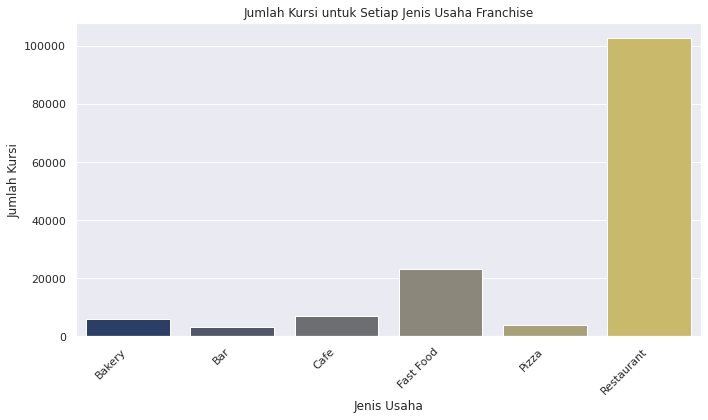

In [325]:
#Membuat grafik jumlah kursi
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.barplot(x='object_type', y='total_seats', data=count_seats_franchise, palette='cividis')
plt.title('Jumlah Kursi untuk Setiap Jenis Usaha Franchise')
plt.xlabel('Jenis Usaha')
plt.ylabel('Jumlah Kursi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Kesimpulan:

    - Jenis usaha franchise yang memiliki jumlah kursi paling banyak adalah Restaurant sebanyak 102810 kursi
    - Jenis usaha franchise yang memiliki jumlah kursi paling sedikit adalah Bar sebanyak 3100 kursi
    - Berdasarkan kedua grafik di atas, ciri-ciri usaha yang berbasis franchise adalah usaha yang memiliki 
    banyak tempat dan juga banyak kursi

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 3.5. Menentukan jumlah rata-rata kursi untuk setiap jenis usaha franchise

In [326]:
only_franchise

,id,object_name,address,franchise,object_type,number
224,12380,KABUKI JAPANESE RESTAURANT,1545 N VINE ST,Yes,Restaurant,229
184,12261,MOUNTAINGATE COUNTRY CLUB,12445 MOUNTAIN GATE DR,Yes,Restaurant,229
2828,19169,MANNA KOREAN BBQ,3986 WILSHIRE BLVD,Yes,Restaurant,229
2081,17264,CHUCK E CHEESE'S #397,2706 WILSHIRE BLVD,Yes,Restaurant,228
179,12243,USC MAIN KITCHEN-BASEMENT,3607 TROUSDALE PKWY,Yes,Restaurant,227
...,...,...,...,...,...,...
2050,17178,RASPADOS DON MANUEL,2848 E 4TH ST,Yes,Restaurant,1
2074,17244,PARU'S INDIAN RESTAURANT,5140 W SUNSET BLVD,Yes,Restaurant,1
2115,17363,BERLIN CURRYWURST,3827 W SUNSET BLVD STE #C,Yes,Restaurant,1
2116,17364,VICKY'S RESTAURANT,2308 E 1ST ST,Yes,Restaurant,1


In [327]:
only_franchise['number'].mean()

39.69423286180631

In [328]:
avg_seats_number = only_franchise.groupby('object_type').agg(mean=('number', 'mean')).sort_values(by='mean', ascending=False)
avg_seats_number.columns =['avg_seats']
avg_seats_number

,avg_seats
object_type,
Restaurant,44.856021
Bar,40.259740
Fast Food,38.089256
Cafe,25.917293
Pizza,25.529412
Bakery,21.773852


<AxesSubplot:title={'center':'Rata-rata Jumlah Kursi'}, xlabel='Jenis Usaha'>

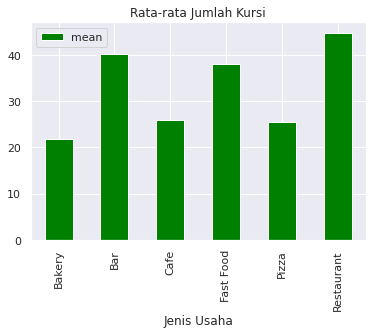

In [329]:
only_franchise.groupby('object_type').agg(mean=('number', 'mean')).plot(kind='bar', color='green', title='Rata-rata Jumlah Kursi', xlabel='Jenis Usaha')

Kesimpulan:

- Untuk usaha franchise, Restaurant memiliki rata-rata jumlah kursi yang paling banyak yakni 44 sampai 45 kursi 
- Bakery memiliki rata-rata jumlah kursi yang paling sedikit yakni 21 sampai 22 kursi

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 3.6. Menganalisis Usaha Berdasarkan Nama Jalan (Alamat)

In [330]:
#Memisahkan nama jalan dari kolom address
rest['address'].str.split(' ')[0:]

0              [3708, N, EAGLE, ROCK, BLVD]
1                 [100, WORLD, WAY, #, 120]
2           [6801, HOLLYWOOD, BLVD, #, 253]
3                   [1814, W, SUNSET, BLVD]
4                   [2100, ECHO, PARK, AVE]
                       ...                 
9643                  [217, W, TEMPLE, AVE]
9644                   [5750, MELROSE, AVE]
9645                [6741, HOLLYWOOD, BLVD]
9646         [548, S, SPRING, ST, STE, 100]
9647    [1300, S, SAN, PEDRO, ST, STE, 111]
Name: address, Length: 9648, dtype: object

In [331]:
rest['street'] = rest['address'].apply(lambda x: ' '.join(x.split(' ')[1:])).to_frame()
rest

,id,object_name,address,franchise,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,No,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,No,Restaurant,9,WORLD WAY # 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,No,Fast Food,20,HOLLYWOOD BLVD # 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,No,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,No,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9643,21432,HALL OF JUSTICE,217 W TEMPLE AVE,No,Restaurant,122,W TEMPLE AVE
9644,21433,FIN-MELROSE,5750 MELROSE AVE,No,Restaurant,93,MELROSE AVE
9645,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,Yes,Fast Food,15,HOLLYWOOD BLVD
9646,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,No,Cafe,6,S SPRING ST STE 100


***3.6.1.Membuat grafik yang menampilkan sepuluh nama jalan teratas berdasarkan jumlah usaha (tempat makan)***

In [332]:
top_10_street = rest['street'].value_counts().nlargest(10)
top_10_street

W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
S WESTERN AVE        128
Name: street, dtype: int64

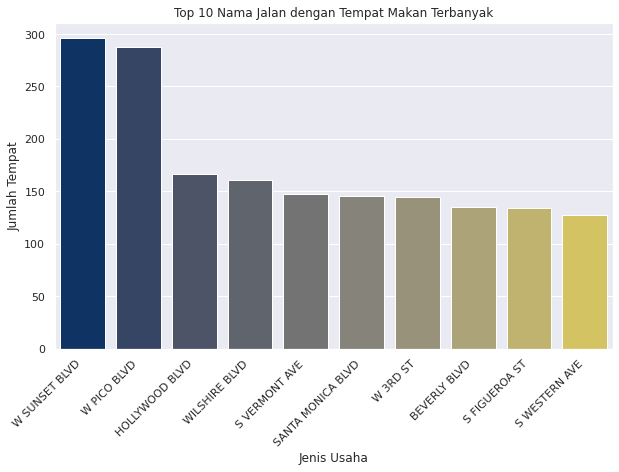

In [333]:
#Membuat grafik nama jalan dengan jumlah usaha tempat makan terbanyak
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.barplot(x=top_10_street.index, y=top_10_street.values, palette='cividis')
plt.title('Top 10 Nama Jalan dengan Tempat Makan Terbanyak')
plt.xlabel('Jenis Usaha')
plt.ylabel('Jumlah Tempat')
plt.xticks(rotation=45, ha='right')
plt.show()

Kesimpulan:

    - Daerah di Los Angeles yang memiliki usaha tempat makan paling banyak adalah di Jalan W SUNSET BLVD 
    sebanyak 296 tempat, disusul oleh Jalan W PICO BLVD sebanyak 288 tempat.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

***3.6.2.Menemukan jumlah jalan yang hanya memiliki satu usaha (tempat makan)***

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

In [334]:
#Menghitung jumlah usaha untuk setiap nama jalan
counts_per_street = rest['street'].value_counts()
counts_per_street

W SUNSET BLVD            296
W PICO BLVD              288
HOLLYWOOD BLVD           167
WILSHIRE BLVD            161
S VERMONT AVE            148
                        ... 
S WESTERN AVE # D & E      1
WORLD WAY # T71            1
E 3RD ST STE 101           1
RIVERSIDE DR               1
W SLAUSON AVE # f-27       1
Name: street, Length: 3097, dtype: int64

In [335]:
print("Jalan di Los Angeles yang hanya memiliki satu usaha tempat makan berjumlah:")
(counts_per_street == 1).sum()

Jalan di Los Angeles yang hanya memiliki satu usaha tempat makan berjumlah:


2481

***3.6.3. Menganalisis distribusi jumlah kursi untuk jalan yang dihuni oleh banyak usaha (tempat makan)***

In [336]:
top_10_street

W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       167
WILSHIRE BLVD        161
S VERMONT AVE        148
SANTA MONICA BLVD    146
W 3RD ST             145
BEVERLY BLVD         135
S FIGUEROA ST        134
S WESTERN AVE        128
Name: street, dtype: int64

In [337]:
#Mengambil sampling tempat usaha di Jalan W Sunset BLVD
seats_at_sunset_blvd = rest[rest['address'].str.contains("W SUNSET BLVD")].reset_index(drop=True)
seats_at_sunset_blvd

,id,object_name,address,franchise,object_type,number,street
0,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,No,Restaurant,22,W SUNSET BLVD
1,11796,EL POLLO LOCO,5319 W SUNSET BLVD,Yes,Restaurant,38,W SUNSET BLVD
2,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,Yes,Bakery,26,W SUNSET BLVD #A
3,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,Yes,Restaurant,118,W SUNSET BLVD
4,11819,ONO HAWAIIAN BBQ,5539 W SUNSET BLVD,Yes,Restaurant,35,W SUNSET BLVD
...,...,...,...,...,...,...,...
363,21284,PA ORD EXPRESS,5301 W SUNSET BLVD # 11,No,Fast Food,31,W SUNSET BLVD # 11
364,21309,BUTTER'S ICE CREAM,2925 W SUNSET BLVD,No,Restaurant,29,W SUNSET BLVD
365,21313,REGULA GUY'S PIZZA,5173 W SUNSET BLVD,No,Pizza,20,W SUNSET BLVD
366,21348,7-ELEVEN STORE #18778D,7600 W SUNSET BLVD,No,Restaurant,1,W SUNSET BLVD


<AxesSubplot:xlabel='number', ylabel='Count'>

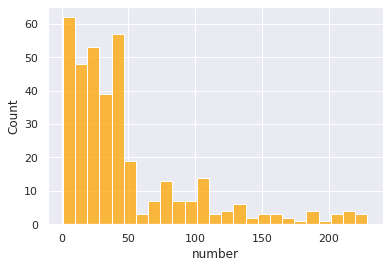

In [338]:
sns.histplot(seats_at_sunset_blvd['number'], color='orange')

In [339]:
seats_at_sunset_blvd['number'].sum()

17945

In [340]:
seats_at_sunset_blvd['number'].describe()

count    368.000000
mean      48.763587
std       49.511522
min        1.000000
25%       16.000000
50%       34.000000
75%       49.000000
max      229.000000
Name: number, dtype: float64

Kesimpulan:

    - Di Jalan W Sunset Blvd terdapat 296 tempat usaha makan dengan total kursi yang digunakan berjumlah 17945 kursi.
    - Rata-rata jumlah kursi yang digunakan sebanyak 48 sampai 49 kursi
    - Jumlah kursi yang palig sedikit digunakan adalah 1 kursi, sedangkan jumlah kursi yang paling banyak digunakan
    adalah 229 kursi.

# 4. Kesimpulan Umum

1. Tabel data Rest memberikan informasi tentang seluruh nama-nama usaha tempat makan di Los Angeles
2. Tabel data Rest terdiri dari 9648 baris data dan 6 kolom
3. Masing-masing data tempat usaha memiliki data nama, alamat, jenis usaha, tipe usaha, dan jumlah kursi yang digunakan
4. Berdasarkan jenis usahanya, usaha yang paling banyak di Los Angeles adalah restaurant sebanyak 7253 tempat atau 75.2 % 
5. Jenis usaha yang berbasis franchise lebih sedikit daripada nonfranchise yakni berjumlah 3676 usaha atau 38.1 %.
6. Jenis usaha yang tidak berbasis franchise berjumlah 5972 usaha atau 61.9 %
7. Dari keenam jenis usaha, semuanya memiliki jenis usaha franchise. Jenis usaha yang paling banyak 
    franchisenya adalah jenis Restaurant sebanyak 2292 usaha. Namun secara ratio jenis usaha Restaurant memiliki 
    ratio franchise paling kecil yakni 31.6 %
8. Dari segi ratio, jenis usaha Bakery memiliki ratio franchise terbesar yakni 99.64 %. Dari 284 tempat usaha Bakery, hanya 1 tempat yang nonfranchise.
9. Jenis usaha franchise yang memiliki tempat yang paling banyak adalah Restaurant sebanyak 2292 tempat usaha.
10. Jenis usaha franchise yang memiliki tempat yang paling sedikit adalah Bar sebanyak 77 tempat usaha.
11. Jenis usaha franchise yang memiliki jumlah kursi paling banyak adalah Restaurant sebanyak 102810 kursi.
12. Jenis usaha franchise yang memiliki jumlah kursi paling sedikit adalah Bar sebanyak 3100 kursi.
13. Berdasarkan kedua grafik di atas, ciri-ciri usaha yang berbasis franchise adalah usaha yang memiliki 
    banyak tempat dan juga banyak kursi.
14. Untuk usaha franchise, Restaurant memiliki rata-rata jumlah kursi yang paling banyak yakni 44 sampai 45 kursi.
15. Bakery memiliki rata-rata jumlah kursi yang paling sedikit yakni 21 sampai 22 kursi.
16. Daerah di Los Angeles yang memiliki usaha tempat makan paling banyak adalah di Jalan W SUNSET BLVD sebanyak 
296 tempat, disusul oleh Jalan W PICO BLVD sebanyak 288 tempat.
17. Terdapat 2481 Jalan di Los Angeles yang hanya memiliki satu usaha tempat makan.
18. Di Jalan W Sunset Blvd terdapat 296 tempat usaha makan dengan total kursi yang digunakan berjumlah 17945 kursi.
19. Rata-rata jumlah kursi yang digunakan di Jalan W Sunset Blvd sebanyak 48 sampai 49 kursi.
20. Jumlah kursi yang palig sedikit digunakan adalah 1 kursi, sedangkan jumlah kursi yang paling banyak digunakan
    adalah 229 kursi.


***Saran:***

- Untuk membuka kafe dengan menggunakan robot sebagai pelayan atau pramusaji, dibutuhkan analisis lebih lanjut 
    terkait perilaku konsumen dan Return On Investment (ROI).


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 5. Mempersiapkan presentasi



File presentasi sprint 9 tersimpan dengan nama file Project sprint 9 pdf. 
Untuk membukanya silakan klik tautan ini: 
https://drive.google.com/drive/u/0/folders/1lkiEKA-QNAspfi60BekT4cgAPzHqM-9Q

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>